In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from minisom import MiniSom

# Stats
from scipy.stats import chi2_contingency

warnings.filterwarnings("ignore", category=FutureWarning)

## Import

In [2]:
df = pd.read_excel('./BELIZE_DATI_BIN_OPHI.xlsx')

In [3]:
df.head()

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0


**Variables**

- **hh\_id (Household ID):** Uniquely identifies each household.
- **ind\_id (Individual ID):** Uniquely identifies individuals within households.
- **d\_cm (Child Mortality):** Indicates recent child mortality, where 0 signifies no under-18 child mortality in the last 5 years, and 1 indicates the opposite.
- **d\_nutr (Nutrition):** Flags households with malnourished individuals (0 = No, 1 = Yes).
- **d\_satt (School Attendance):** Reflects school attendance for all school-age children up to class 8 (0 = No, 1 = Yes).
- **d\_educ (Years of Schooling):** Marks households with at least one member having 6 years of education (0 = No, 1 = Yes).
- **d\_elect (Electricity):** Indicates households with electricity access (0 = No, 1 = Yes).
- **d\_wtr (Drinking Water):** Highlights access to drinking water meeting MDG standards, considering distance (0 = No, 1 = Yes).
- **d\_sani (Sanitation):** Flags households with improved sanitation meeting MDG standards (0 = No, 1 = Yes).
- **d\_hsg (Housing):** Identifies households with housing conditions meeting quality standards (0 = No, 1 = Yes).
- **d\_cklf (Cooking Fuel):** Flags households using cooking fuel meeting MDG standards (0 = No, 1 = Yes).
- **d\_asst (Assets):** Indicates ownership of assets like a car or more than one small asset, including a computer and an animal cart (0 = No, 1 = Yes).
- **miss (Missing Indicators):** Identifies individuals with at least one missing indicator (0 = No missing, 1 = At least one missing).
- **weighted\_sum (Weighted Indicators Sum):** Represents the sum of weighted indicator values (continuous scale).
- **multi\_deprived (Multidimensional Poverty):** Flags individuals considered multidimensionally poor based on the standard MPI second cut-off of 33.33% (0 = Not poor, 1 = Poor).


In [87]:
df.shape

(19257, 15)

In [95]:
df.groupby('hh_id')['ind_id'].count().count()

4636

In [5]:
df.columns

Index(['hh_id', 'ind_id', 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct',
       'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'weighted_sum',
       'multi_poor'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hh_id         19257 non-null  int64  
 1   ind_id        19257 non-null  int64  
 2   d_cm          19098 non-null  float64
 3   d_nutr        18409 non-null  float64
 4   d_satt        19251 non-null  float64
 5   d_educ        19094 non-null  float64
 6   d_elct        19257 non-null  int64  
 7   d_wtr         19257 non-null  int64  
 8   d_sani        19257 non-null  int64  
 9   d_hsg         19250 non-null  float64
 10  d_ckfl        19257 non-null  int64  
 11  d_asst        19257 non-null  int64  
 12  miss          19257 non-null  int64  
 13  weighted_sum  18169 non-null  float64
 14  multi_poor    18169 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.2 MB


In [45]:
# 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'multi_poor'
for column in df.iloc[:, 2:-2].join(df.iloc[:, -1:]):
    df[column] = df[column].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   hh_id         19257 non-null  int64   
 1   ind_id        19257 non-null  int64   
 2   d_cm          19098 non-null  category
 3   d_nutr        18409 non-null  category
 4   d_satt        19251 non-null  category
 5   d_educ        19094 non-null  category
 6   d_elct        19257 non-null  category
 7   d_wtr         19257 non-null  category
 8   d_sani        19257 non-null  category
 9   d_hsg         19250 non-null  category
 10  d_ckfl        19257 non-null  category
 11  d_asst        19257 non-null  category
 12  miss          19257 non-null  category
 13  weighted_sum  18169 non-null  float64 
 14  multi_poor    18169 non-null  category
dtypes: category(12), float64(1), int64(2)
memory usage: 678.6 KB


# Exploratory Data Analysis (EDA)

In [29]:
df.describe()

,hh_id,ind_id,weighted_sum
count,19257.000000,1.925700e+04,18169.000000
mean,11043.279015,1.103203e+07,0.079161
std,6486.814150,6.486737e+06,0.114116
min,101.000000,1.001010e+05,0.000000
25%,5122.000000,5.102202e+06,0.000000
50%,11220.000000,1.120200e+07,0.000000
75%,16710.000000,1.670101e+07,0.166667
max,21824.000000,2.180241e+07,0.722222


**Percentage of 1s, 0s, and NaN values for each variable Binary Variable**

In [46]:
# Calculate the percentage of 1s, 0s, and NaN values for each variable
percentage_counts = {}
for col in df.iloc[:, 2:-2].join(df.iloc[:, -1:]):
    if pd.api.types.is_categorical_dtype(df[col]):
        counts = df[col].value_counts(normalize=True)
        percentage_counts[col] = {
            '1': counts.get(1, 0) * 100,
            '0': counts.get(0, 0) * 100,
            'NaN': df[col].isna().mean() * 100
        }

# Display the results
for col, counts in percentage_counts.items():
    print(f'\nVariable: {col}')
    print(f'Percentage of 1: {counts["1"]:.2f}%')
    print(f'Percentage of 0: {counts["0"]:.2f}%')
    print(f'Percentage of NaN: {counts["NaN"]:.2f}%')


Variable: d_cm
Percentage of 1: 3.73%
Percentage of 0: 96.27%
Percentage of NaN: 0.83%

Variable: d_nutr
Percentage of 1: 12.73%
Percentage of 0: 87.27%
Percentage of NaN: 4.40%

Variable: d_satt
Percentage of 1: 5.42%
Percentage of 0: 94.58%
Percentage of NaN: 0.03%

Variable: d_educ
Percentage of 1: 1.75%
Percentage of 0: 98.25%
Percentage of NaN: 0.85%

Variable: d_elct
Percentage of 1: 10.17%
Percentage of 0: 89.83%
Percentage of NaN: 0.00%

Variable: d_wtr
Percentage of 1: 4.86%
Percentage of 0: 95.14%
Percentage of NaN: 0.00%

Variable: d_sani
Percentage of 1: 13.41%
Percentage of 0: 86.59%
Percentage of NaN: 0.00%

Variable: d_hsg
Percentage of 1: 19.74%
Percentage of 0: 80.26%
Percentage of NaN: 0.04%

Variable: d_ckfl
Percentage of 1: 17.67%
Percentage of 0: 82.33%
Percentage of NaN: 0.00%

Variable: d_asst
Percentage of 1: 4.18%
Percentage of 0: 95.82%
Percentage of NaN: 0.00%

Variable: miss
Percentage of 1: 5.65%
Percentage of 0: 94.35%
Percentage of NaN: 0.00%

Variable: 

In [31]:
# Missing values
df.isnull().sum()

hh_id              0
ind_id             0
d_cm             159
d_nutr           848
d_satt             6
d_educ           163
d_elct             0
d_wtr              0
d_sani             0
d_hsg              7
d_ckfl             0
d_asst             0
miss               0
weighted_sum    1088
multi_poor      1088
dtype: int64

In [13]:
# Missing Values Percentage
df.isnull().sum()/len(df)*100

hh_id           0.000000
ind_id          0.000000
d_cm            0.825674
d_nutr          4.403593
d_satt          0.031158
d_educ          0.846445
d_elct          0.000000
d_wtr           0.000000
d_sani          0.000000
d_hsg           0.036350
d_ckfl          0.000000
d_asst          0.000000
miss            0.000000
weighted_sum    5.649894
multi_poor      5.649894
dtype: float64

The presented output displays the percentage of missing values for each variable in the dataset. Notably, the unique identifiers, `hh_id` and `ind_id`, exhibit no missing values, ensuring the integrity of household and individual identification. However, variables such as `d_nutr` and `d_educ` demonstrate relatively higher percentages of missing values, suggesting a need for cautious interpretation, especially considering their significance in measuring malnutrition and educational attainment. For variables like `d_satt` with minimal missing values, straightforward analysis may proceed without substantial concerns. Careful consideration of missing data is crucial to maintaining the robustness and reliability of subsequent analyses.

In [32]:
# Unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for hh_id: [  101   102   103 ... 21822 21823 21824]
Unique values for ind_id: [  100101   100102   100201 ... 21802404 21802405 21802406]
Unique values for d_cm: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_nutr: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_satt: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_educ: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_elct: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_wtr: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_sani: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_hsg: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_ckfl: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_asst: [0, 1]
Categories (2, int64): [0, 1]
Unique values for miss: [0, 1]
Categories (2, int64): [0, 1]
Unique values for weighted_sum: [0.         0.16666667 0.05555556 0.11111111 0.277777

## Distribution Household and Number of Household component: df_hh

The dataset is composed by 4636 households and 19257 individuals, each individual within the households share the same values along the variables. Considering this information I decide to create a new dataset with only households information but adding one column to dataset defining the number of components within the household.

In [47]:
len(df['hh_id'].unique()), len(df['ind_id'].unique())

(4636, 19257)

In [ ]:
df[df['hh_id']==319]

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor
221,319,301901,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
222,319,301902,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
223,319,301903,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
224,319,301904,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
225,319,301905,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
226,319,301906,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
227,319,301907,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
228,319,301908,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0
229,319,301909,0.0,0.0,0.0,0.0,0,0,0,1.0,0,0,0.055556,0.0


In [ ]:
df[df['hh_id']==606]

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor
402,606,600601,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
403,606,600602,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
404,606,600603,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
405,606,600604,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0
406,606,600605,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0


In [48]:
df_hhid_distr = df.groupby('hh_id', as_index=False)['ind_id'].size()
df_hhid_distr = df_hhid_distr.rename(columns={'hh_id': 'hh_id', 'size': 'ind_id_count'})
df_hhid_distr

,hh_id,ind_id_count
0,101,2
1,102,1
2,103,4
3,104,5
4,105,6
...,...,...
4631,21820,5
4632,21821,10
4633,21822,3
4634,21823,6


In [49]:
df_merge = pd.merge(df, df_hhid_distr, on='hh_id')
df_merge

,hh_id,ind_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor,ind_id_count
0,101,100101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,2
1,101,100102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,2
2,102,100201,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,1
3,103,100301,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,4
4,103,100302,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19252,21824,21802402,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,6
19253,21824,21802403,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,6
19254,21824,21802404,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,6
19255,21824,21802405,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,6


In [29]:
ind_id_count_distr = df_hhid_distr.groupby('ind_id_count', as_index=False)['hh_id'].size()
ind_id_count_distr

,ind_id_count,size
0,1,604
1,2,619
2,3,769
3,4,860
4,5,675
5,6,439
6,7,276
7,8,173
8,9,85
9,10,53


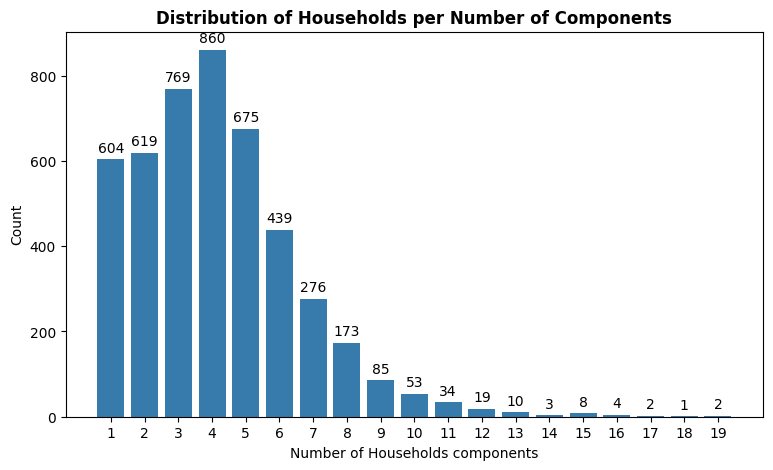

In [45]:
# Assuming your data is in a DataFrame named df
dfsort = pd.DataFrame({
    'ind_id_count': [604, 619, 769, 860, 675, 439, 276, 173, 85, 53, 34, 19, 10, 3, 8, 4, 2, 1, 2],
    'size': list(range(1, 20))
})

# Set the width of the bars
bar_width = 0.8  # Adjust this value to control the width of the bars

# Set the figsize for the entire figure
fig, ax = plt.subplots(figsize=(9,5))

# Create a bar plot with more space between bars
ax.bar(dfsort['size'], dfsort['ind_id_count'], width=bar_width, color=sns.color_palette("Blues_d")[-3])

# Add value labels on top of each bar
for i, value in enumerate(dfsort['ind_id_count']):
    ax.text(dfsort['size'][i], value + 10, str(value), ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Number of Households components')
ax.set_ylabel('Count')
ax.set_title('Distribution of Households per Number of Components' , fontweight='bold')

# Adjust x-axis ticks and labels to center bars
ax.set_xticks(dfsort['size'])
ax.set_xticklabels(dfsort['size'], ha='center')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust this value to control the space between bars

# Show the plot
plt.show()


In [50]:
df_hh = df_merge.groupby('hh_id').agg('first').reset_index().drop('ind_id', axis=1)
df_hh

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0,0.222222,0.0,5
4632,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0,0.222222,0.0,10
4633,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0,0.388889,1.0,3
4634,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0,0.500000,1.0,6


In [34]:
# Save data to csv
df_hh.to_csv('./BELIZE_hh.csv', index=False)

## Analysis and Visualizations of df_hh

In [8]:
df = pd.read_csv('BELIZE_hh.csv')
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0,0.222222,0.0,5
4632,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0,0.222222,0.0,10
4633,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0,0.388889,1.0,3
4634,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0,0.500000,1.0,6


In [52]:
df.shape

(4636, 15)

In [53]:
df.columns

Index(['hh_id', 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr',
       'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'weighted_sum',
       'multi_poor', 'ind_id_count'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4636 entries, 0 to 4635
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hh_id         4636 non-null   int64  
 1   d_cm          4603 non-null   float64
 2   d_nutr        4466 non-null   float64
 3   d_satt        4635 non-null   float64
 4   d_educ        4602 non-null   float64
 5   d_elct        4636 non-null   int64  
 6   d_wtr         4636 non-null   int64  
 7   d_sani        4636 non-null   int64  
 8   d_hsg         4633 non-null   float64
 9   d_ckfl        4636 non-null   int64  
 10  d_asst        4636 non-null   int64  
 11  miss          4636 non-null   int64  
 12  weighted_sum  4411 non-null   float64
 13  multi_poor    4411 non-null   float64
 14  ind_id_count  4636 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 543.4 KB


In [60]:
# 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'multi_poor'
for column in df.iloc[:, 1:-3].join(df.iloc[:, -2]):
    df[column] = df[column].astype('category')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4636 entries, 0 to 4635
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   hh_id         4636 non-null   int64   
 1   d_cm          4603 non-null   category
 2   d_nutr        4466 non-null   category
 3   d_satt        4635 non-null   category
 4   d_educ        4602 non-null   category
 5   d_elct        4636 non-null   category
 6   d_wtr         4636 non-null   category
 7   d_sani        4636 non-null   category
 8   d_hsg         4633 non-null   category
 9   d_ckfl        4636 non-null   category
 10  d_asst        4636 non-null   category
 11  miss          4636 non-null   category
 12  weighted_sum  4411 non-null   float64 
 13  multi_poor    4411 non-null   category
 14  ind_id_count  4636 non-null   int64   
dtypes: category(12), float64(1), int64(2)
memory usage: 164.6 KB


In [63]:
df.iloc[:,1:].describe()

,weighted_sum,ind_id_count
count,4411.000000,4636.000000
mean,0.066513,4.153796
std,0.102448,2.404928
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,4.000000
75%,0.111111,5.000000
max,0.722222,19.000000


In [64]:
# Calculate the percentage of 1s, 0s, and NaN values for each variable
percentage_counts = {}
for col in df.iloc[:, 1:-3].join(df.iloc[:, -2]):
    if pd.api.types.is_categorical_dtype(df[col]):
        counts = df[col].value_counts(normalize=True)
        percentage_counts[col] = {
            '1': counts.get(1, 0) * 100,
            '0': counts.get(0, 0) * 100,
            'NaN': df[col].isna().mean() * 100
        }

# Display the results
for col, counts in percentage_counts.items():
    print(f'\nVariable: {col}')
    print(f'Percentage of 1: {counts["1"]:.2f}%')
    print(f'Percentage of 0: {counts["0"]:.2f}%')
    print(f'Percentage of NaN: {counts["NaN"]:.2f}%')


Variable: d_cm
Percentage of 1: 2.65%
Percentage of 0: 97.35%
Percentage of NaN: 0.71%

Variable: d_nutr
Percentage of 1: 8.44%
Percentage of 0: 91.56%
Percentage of NaN: 3.67%

Variable: d_satt
Percentage of 1: 3.28%
Percentage of 0: 96.72%
Percentage of NaN: 0.02%

Variable: d_educ
Percentage of 1: 3.39%
Percentage of 0: 96.61%
Percentage of NaN: 0.73%

Variable: d_elct
Percentage of 1: 9.53%
Percentage of 0: 90.47%
Percentage of NaN: 0.00%

Variable: d_wtr
Percentage of 1: 4.42%
Percentage of 0: 95.58%
Percentage of NaN: 0.00%

Variable: d_sani
Percentage of 1: 14.00%
Percentage of 0: 86.00%
Percentage of NaN: 0.00%

Variable: d_hsg
Percentage of 1: 17.74%
Percentage of 0: 82.26%
Percentage of NaN: 0.06%

Variable: d_ckfl
Percentage of 1: 14.00%
Percentage of 0: 86.00%
Percentage of NaN: 0.00%

Variable: d_asst
Percentage of 1: 5.37%
Percentage of 0: 94.63%
Percentage of NaN: 0.00%

Variable: miss
Percentage of 1: 4.85%
Percentage of 0: 95.15%
Percentage of NaN: 0.00%

Variable: mu

In [65]:
# Missing values
df.isnull().sum()

hh_id             0
d_cm             33
d_nutr          170
d_satt            1
d_educ           34
d_elct            0
d_wtr             0
d_sani            0
d_hsg             3
d_ckfl            0
d_asst            0
miss              0
weighted_sum    225
multi_poor      225
ind_id_count      0
dtype: int64

In [66]:
# Missing Values Percentage
df.isnull().sum()/len(df)*100

hh_id           0.000000
d_cm            0.711821
d_nutr          3.666954
d_satt          0.021570
d_educ          0.733391
d_elct          0.000000
d_wtr           0.000000
d_sani          0.000000
d_hsg           0.064711
d_ckfl          0.000000
d_asst          0.000000
miss            0.000000
weighted_sum    4.853322
multi_poor      4.853322
ind_id_count    0.000000
dtype: float64

In [67]:
# Unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")
    print('--------------------------------------------------')

Unique values for hh_id: [  101   102   103 ... 21822 21823 21824]
Unique values for d_cm: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_nutr: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_satt: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_educ: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_elct: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_wtr: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_sani: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_hsg: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Unique values for d_ckfl: [0, 1]
Categories (2, int64): [0, 1]
Unique values for d_asst: [0, 1]
Categories (2, int64): [0, 1]
Unique values for miss: [0, 1]
Categories (2, int64): [0, 1]
Unique values for weighted_sum: [0.         0.16666667 0.05555556 0.11111111 0.27777778        nan
 0.22222222 0.38888889 0.33333333 0.44444444 0.44444444 0.5
 0.38888889 

### Percentage Distribution of 1s and 0s per binary variable

In [68]:
def bar_plot_categorical_subplot(variables: list, variable_names: list):
    # Assuming df is your DataFrame
    sns.set(style="whitegrid")
    
    # Calculate the number of rows and columns for the subplots
    rows = len(variables) // 4 + len(variables) % 4
    cols = 4

    # Set up the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(16, 13.5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each variable and create a bar plot
    for i, (variable, variable_name) in enumerate(zip(variables, variable_names)):
        # Calculate the percentage distribution
        percentage_distribution = variable.value_counts(normalize=True) * 100

        # Create a bar plot
        ax = sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette="Blues_d", ax=axes[i])

        # Adding percentage values on top of the bars
        for j, value in enumerate(percentage_distribution):
            ax.text(j, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

        # Set labels and title for each subplot
        ax.set(xlabel=variable_name, ylabel='Percentage (%)')
        ax.set_title(f'Percentage Distribution of {variable_name}', fontweight='bold', y=1.05)
    
    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [69]:
df.columns

Index(['hh_id', 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr',
       'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'miss', 'weighted_sum',
       'multi_poor', 'ind_id_count'],
      dtype='object')

In [70]:
# Example usage
variables = [df['d_cm'], df['d_nutr'], df['d_satt'], df['d_educ'], df['d_elct'],
             df['d_wtr'], df['d_sani'], df['d_hsg'], df['d_ckfl'], df['d_asst'],
             df['miss'], df['multi_poor']]

variable_names = ['d_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct',
                  'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst',
                  'miss', 'multi_poor']

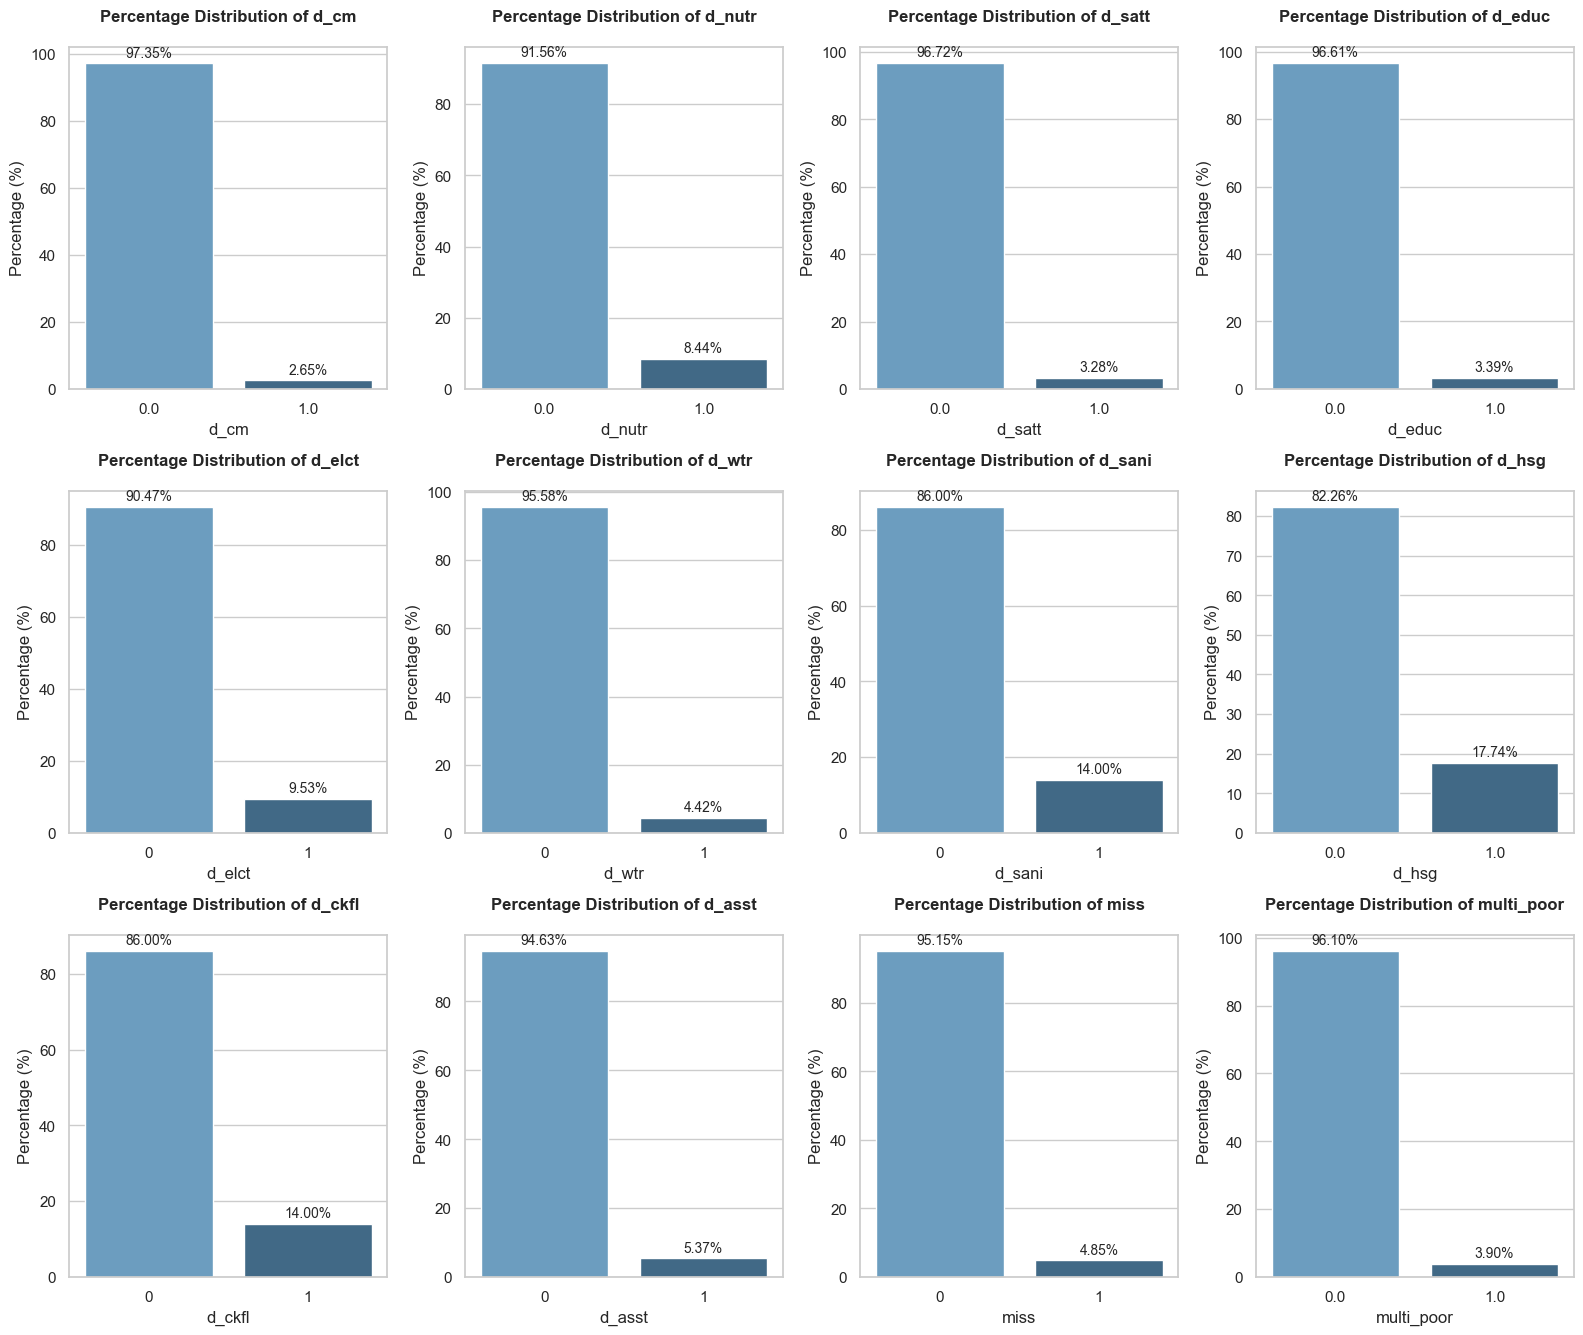

In [71]:
bar_plot_categorical_subplot(variables, variable_names)

In [72]:
print(f'Number of observations in df: {len(df)}')
print(f'Number of observation in df with at least one missing value: {round(len(df)*0.0565)}')
print(f'Number of observation in df without missing values: {len(df) - round(len(df)*0.0565)}')

Number of observations in df: 4636
Number of observation in df with at least one missing value: 262
Number of observation in df without missing values: 4374


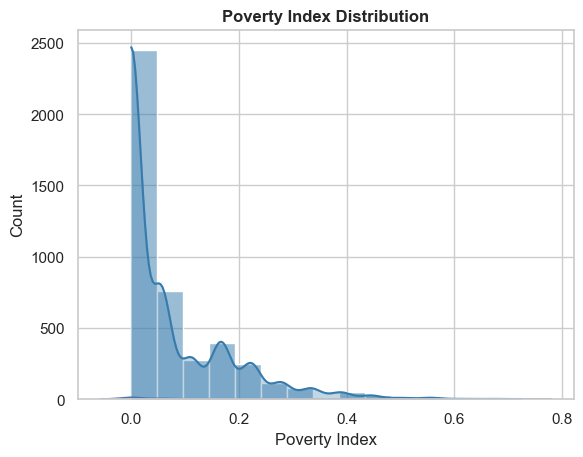

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a continuous variable
sns.histplot(df['weighted_sum'], bins=15, kde=True, color=sns.color_palette("Blues_d")[-3])

# Extracting the values from the KDE plot to fill the area underneath
x, y = sns.kdeplot(df['weighted_sum'], fill=False).get_lines()[0].get_data()

# Filling the area underneath the curve with a darker blue
plt.fill_between(x, y, color=sns.color_palette("Blues_d")[-3], alpha=0.3)

plt.ylim(0.0)

plt.xlabel("Poverty Index")

plt.title("Poverty Index Distribution", fontweight='bold')

plt.show()


I remove rows with at least one nan values

## Dataset hh without missing values

In [87]:
df_nomiss = df[df['miss'] != 1]
df_nomiss = df_nomiss.drop('miss', axis=1)
df_nomiss

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.222222,0.0,5
4632,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.222222,0.0,10
4633,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0.388889,1.0,3
4634,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0.500000,1.0,6


In [91]:
df_nomiss.to_csv('./BELIZE_hh_nomiss.csv', index=False)

In [83]:
df_nomiss['weighted_sum'].unique()

array([0.        , 0.16666667, 0.05555556, 0.11111111, 0.27777778,
       0.22222222, 0.38888889, 0.33333333, 0.44444444, 0.44444444,
       0.5       , 0.38888889, 0.55555556, 0.61111111, 0.5       ,
       0.66666667, 0.72222222])

Remove rows without missing values. Maybe let's consider before to calculate the weighted values for weighted_sum

### Correlation plot

In [84]:
df_nomiss.select_dtypes(include='category')

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4631,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.0
4632,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.0
4633,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,1.0
4634,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,1.0


In [88]:
df_binary_categorical = df_nomiss.select_dtypes(include='category')
df_binary_categorical

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4631,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.0
4632,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.0
4633,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,1.0
4634,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,1.0


<Axes: title={'center': 'Phi Correlation Plot between Binary Variables'}>

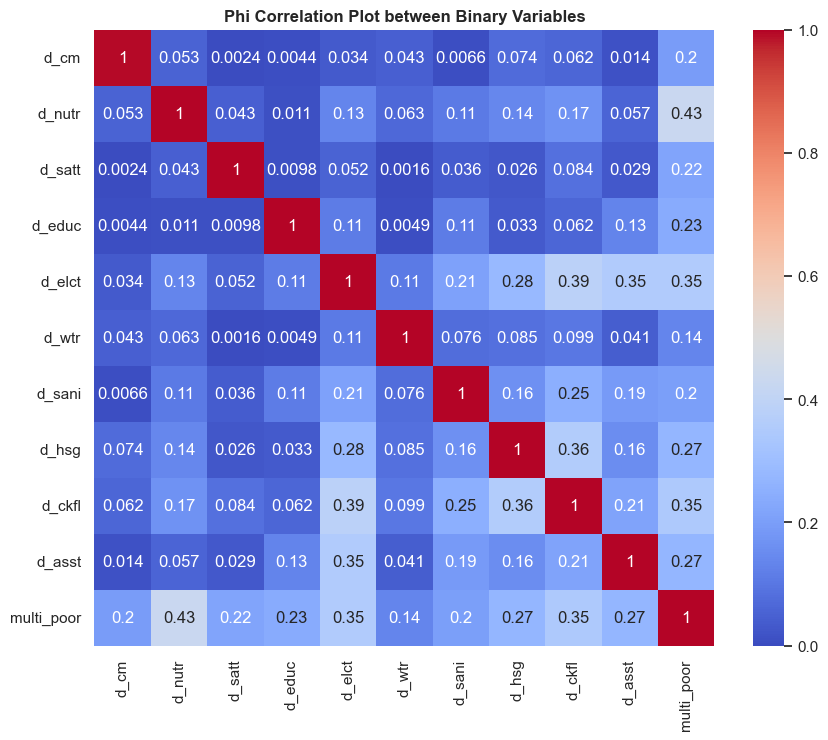

In [89]:
# Function to calculate the Phi coefficient
def calculate_phi_coefficient(var1, var2):
    confusion_matrix = pd.crosstab(var1, var2)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi_coefficient = np.sqrt(chi2 / n)
    return phi_coefficient

# Create a matrix of Phi coefficients
num_vars = df_binary_categorical.shape[1]
phi_matrix = np.zeros((num_vars, num_vars))

for i in range(num_vars):
    for j in range(num_vars):
        phi_matrix[i, j] = calculate_phi_coefficient(df_binary_categorical.iloc[:, i], df_binary_categorical.iloc[:, j])

# Create a DataFrame from the Phi matrix
phi_df = pd.DataFrame(phi_matrix, columns=df_binary_categorical.columns, index=df_binary_categorical.columns)

plt.figure(figsize=(10, 8))
plt.title("Phi Correlation Plot between Binary Variables", fontweight='bold')

# Create a corrplot using seaborn
sns.heatmap(phi_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)


In [90]:
phi_df

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
d_cm,0.995646,0.052735,0.002378,0.004361,0.034444,0.043237,0.006568,0.073956,0.061940,0.014437,0.195233
d_nutr,0.052735,0.998543,0.043416,0.010794,0.134371,0.063454,0.106110,0.139387,0.167603,0.057448,0.427787
d_satt,0.002378,0.043416,0.996362,0.009810,0.052027,0.001595,0.035952,0.026421,0.084189,0.028949,0.218706
d_educ,0.004361,0.010794,0.009810,0.996593,0.109685,0.004939,0.110778,0.032673,0.062214,0.130873,0.234815
d_elct,0.034444,0.134371,0.052027,0.109685,0.998690,0.108779,0.208149,0.281611,0.385407,0.353235,0.354537
d_wtr,0.043237,0.063454,0.001595,0.004939,0.108779,0.997304,0.076258,0.084952,0.099231,0.041091,0.136703
d_sani,0.006568,0.106110,0.035952,0.110778,0.208149,0.076258,0.999087,0.162287,0.247362,0.189579,0.201064
d_hsg,0.073956,0.139387,0.026421,0.032673,0.281611,0.084952,0.162287,0.999233,0.357415,0.155059,0.269642
d_ckfl,0.061940,0.167603,0.084189,0.062214,0.385407,0.099231,0.247362,0.357415,0.999081,0.211195,0.345727
d_asst,0.014437,0.057448,0.028949,0.130873,0.353235,0.041091,0.189579,0.155059,0.211195,0.997725,0.269945


### TO MODIFY COMPLETELY!!!

The provided correlation matrix represents the pairwise correlations between binary variables in your dataset. Here are some comments on the matrix:

- **d_cm (Child Mortality):**
  - Correlation with other variables is generally low, except for a moderate correlation with `multi_poor` (0.21), indicating a notable connection between child mortality and multidimensional poverty.

- **d_nutr (Nutrition):**
  - There is a relatively low correlation with other variables, but a higher correlation with `multi_poor` (0.49), suggesting a stronger association between malnutrition and multidimensional poverty.

- **d_satt (School Attendance):**
  - Most correlations are low, indicating weak relationships with other variables. There is a moderate correlation with `multi_poor` (0.27), implying a connection between school attendance and multidimensional poverty.

- **d_educ (Years of Schooling):**
  - Shows very low correlations with other variables, indicating weak linear relationships.

- **d_elct (Electricity):**
  - Moderate to high correlations with several variables, particularly with `d_ckfl` (0.40), `d_asst` (0.33), and `multi_poor` (0.39), suggesting connections between electricity access, cooking fuel, asset ownership, and multidimensional poverty.

- **d_wtr (Drinking Water):**
  - Low to moderate correlations with other variables, with the highest correlation observed with `d_ckfl` (0.12).

- **d_sani (Sanitation):**
  - Moderately correlated with `d_elct` (0.22) and `d_asst` (0.24), indicating potential associations between sanitation, electricity, asset ownership, and multidimensional poverty.

- **d_hsg (Housing):**
  - Moderate to high correlations with several variables, especially with `d_ckfl` (0.39), `d_asst` (0.30), and `multi_poor` (0.30), suggesting links between housing conditions, cooking fuel, asset ownership, and multidimensional poverty.

- **d_ckfl (Cooking Fuel):**
  - Moderate to high correlations observed, particularly with `d_elct` (0.40), `d_wtr` (0.12), `d_hsg` (0.39), and `d_asst` (0.23).

- **d_asst (Assets):**
  - Moderate correlations with `d_elct` (0.33), `d_hsg` (0.30), `d_ckfl` (0.23), and `multi_poor` (0.28), suggesting connections between asset ownership, electricity, housing, cooking fuel, and multidimensional poverty.

- **multi_poor (Multidimensional Poverty):**
  - Shows moderate to high correlations with several variables, reflecting the multidimensional nature of poverty. Notable correlations include `d_cm` (0.21), `d_nutr` (0.49), `d_satt` (0.27), `d_elct` (0.39), `d_hsg` (0.30), and `d_ckfl` (0.38).

These correlations provide insights into potential relationships between different dimensions of poverty in your dataset.

In [121]:
df = pd.read_csv('BELIZE_hh_nomiss.csv')
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.222222,0.0,5
4407,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.222222,0.0,10
4408,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0.388889,1.0,3
4409,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0.500000,1.0,6


In [93]:
df.isnull().sum()

hh_id           0
d_cm            0
d_nutr          0
d_satt          0
d_educ          0
d_elct          0
d_wtr           0
d_sani          0
d_hsg           0
d_ckfl          0
d_asst          0
weighted_sum    0
multi_poor      0
ind_id_count    0
dtype: int64

### Plot Relationship between Poverty and Household Size

Correlation:  0.211615437756141


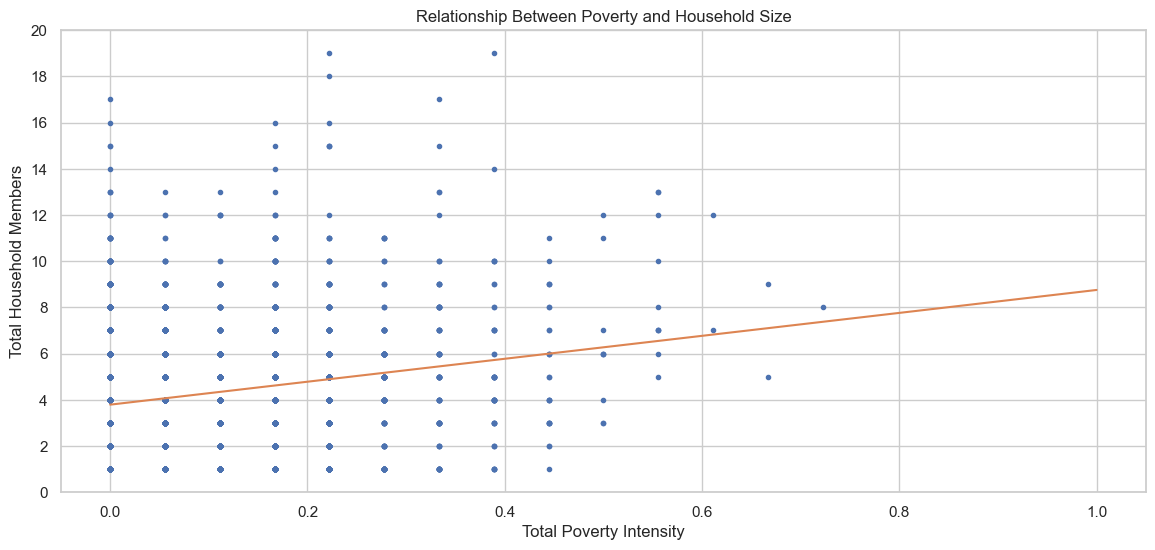

In [97]:
# Relationship Between Poverty and Household Size
slope, intercept = np.polyfit(df['weighted_sum'], df['ind_id_count'], 1)
x_range = range(2)
_ = plt.figure(figsize=(14,6))
_ = plt.plot(df['weighted_sum'], df['ind_id_count'], linestyle='none', marker='.')
_ = plt.plot(x_range, slope*x_range + intercept)
_ = plt.yticks(range(0, 21, 2))
_ = plt.title('Relationship Between Poverty and Household Size')
_ = plt.xlabel('Total Poverty Intensity')
_ = plt.ylabel('Total Household Members')
print('Correlation: ', np.corrcoef(df_nomiss['weighted_sum'], df_nomiss['ind_id_count'])[0][1])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hh_id         4411 non-null   int64  
 1   d_cm          4411 non-null   float64
 2   d_nutr        4411 non-null   float64
 3   d_satt        4411 non-null   float64
 4   d_educ        4411 non-null   float64
 5   d_elct        4411 non-null   int64  
 6   d_wtr         4411 non-null   int64  
 7   d_sani        4411 non-null   int64  
 8   d_hsg         4411 non-null   float64
 9   d_ckfl        4411 non-null   int64  
 10  d_asst        4411 non-null   int64  
 11  weighted_sum  4411 non-null   float64
 12  multi_poor    4411 non-null   float64
 13  ind_id_count  4411 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 482.6 KB


In [100]:
for column in df.iloc[:, 1:-3].join(df.iloc[:, -2]):
    df[column] = df[column].astype('category')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   hh_id         4411 non-null   int64   
 1   d_cm          4411 non-null   category
 2   d_nutr        4411 non-null   category
 3   d_satt        4411 non-null   category
 4   d_educ        4411 non-null   category
 5   d_elct        4411 non-null   category
 6   d_wtr         4411 non-null   category
 7   d_sani        4411 non-null   category
 8   d_hsg         4411 non-null   category
 9   d_ckfl        4411 non-null   category
 10  d_asst        4411 non-null   category
 11  weighted_sum  4411 non-null   float64 
 12  multi_poor    4411 non-null   category
 13  ind_id_count  4411 non-null   int64   
dtypes: category(11), float64(1), int64(2)
memory usage: 152.2 KB


In [102]:
df_binary_categorical = df.select_dtypes(include='category')
df_binary_categorical

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4406,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.0
4407,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.0
4408,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,1.0
4409,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,1.0


In [106]:
list(df_binary_categorical.columns)

['d_cm',
 'd_nutr',
 'd_satt',
 'd_educ',
 'd_elct',
 'd_wtr',
 'd_sani',
 'd_hsg',
 'd_ckfl',
 'd_asst',
 'multi_poor']

In [110]:
for col in df_binary_categorical:
    row = df_binary_categorical[col]
    row

In [113]:
lista = list(df_binary_categorical.columns)
lista

['d_cm',
 'd_nutr',
 'd_satt',
 'd_educ',
 'd_elct',
 'd_wtr',
 'd_sani',
 'd_hsg',
 'd_ckfl',
 'd_asst',
 'multi_poor']

In [118]:
df_binary_categorical

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,multi_poor
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4406,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.0
4407,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.0
4408,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,1.0
4409,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,1.0


<Figure size 1500x1500 with 0 Axes>

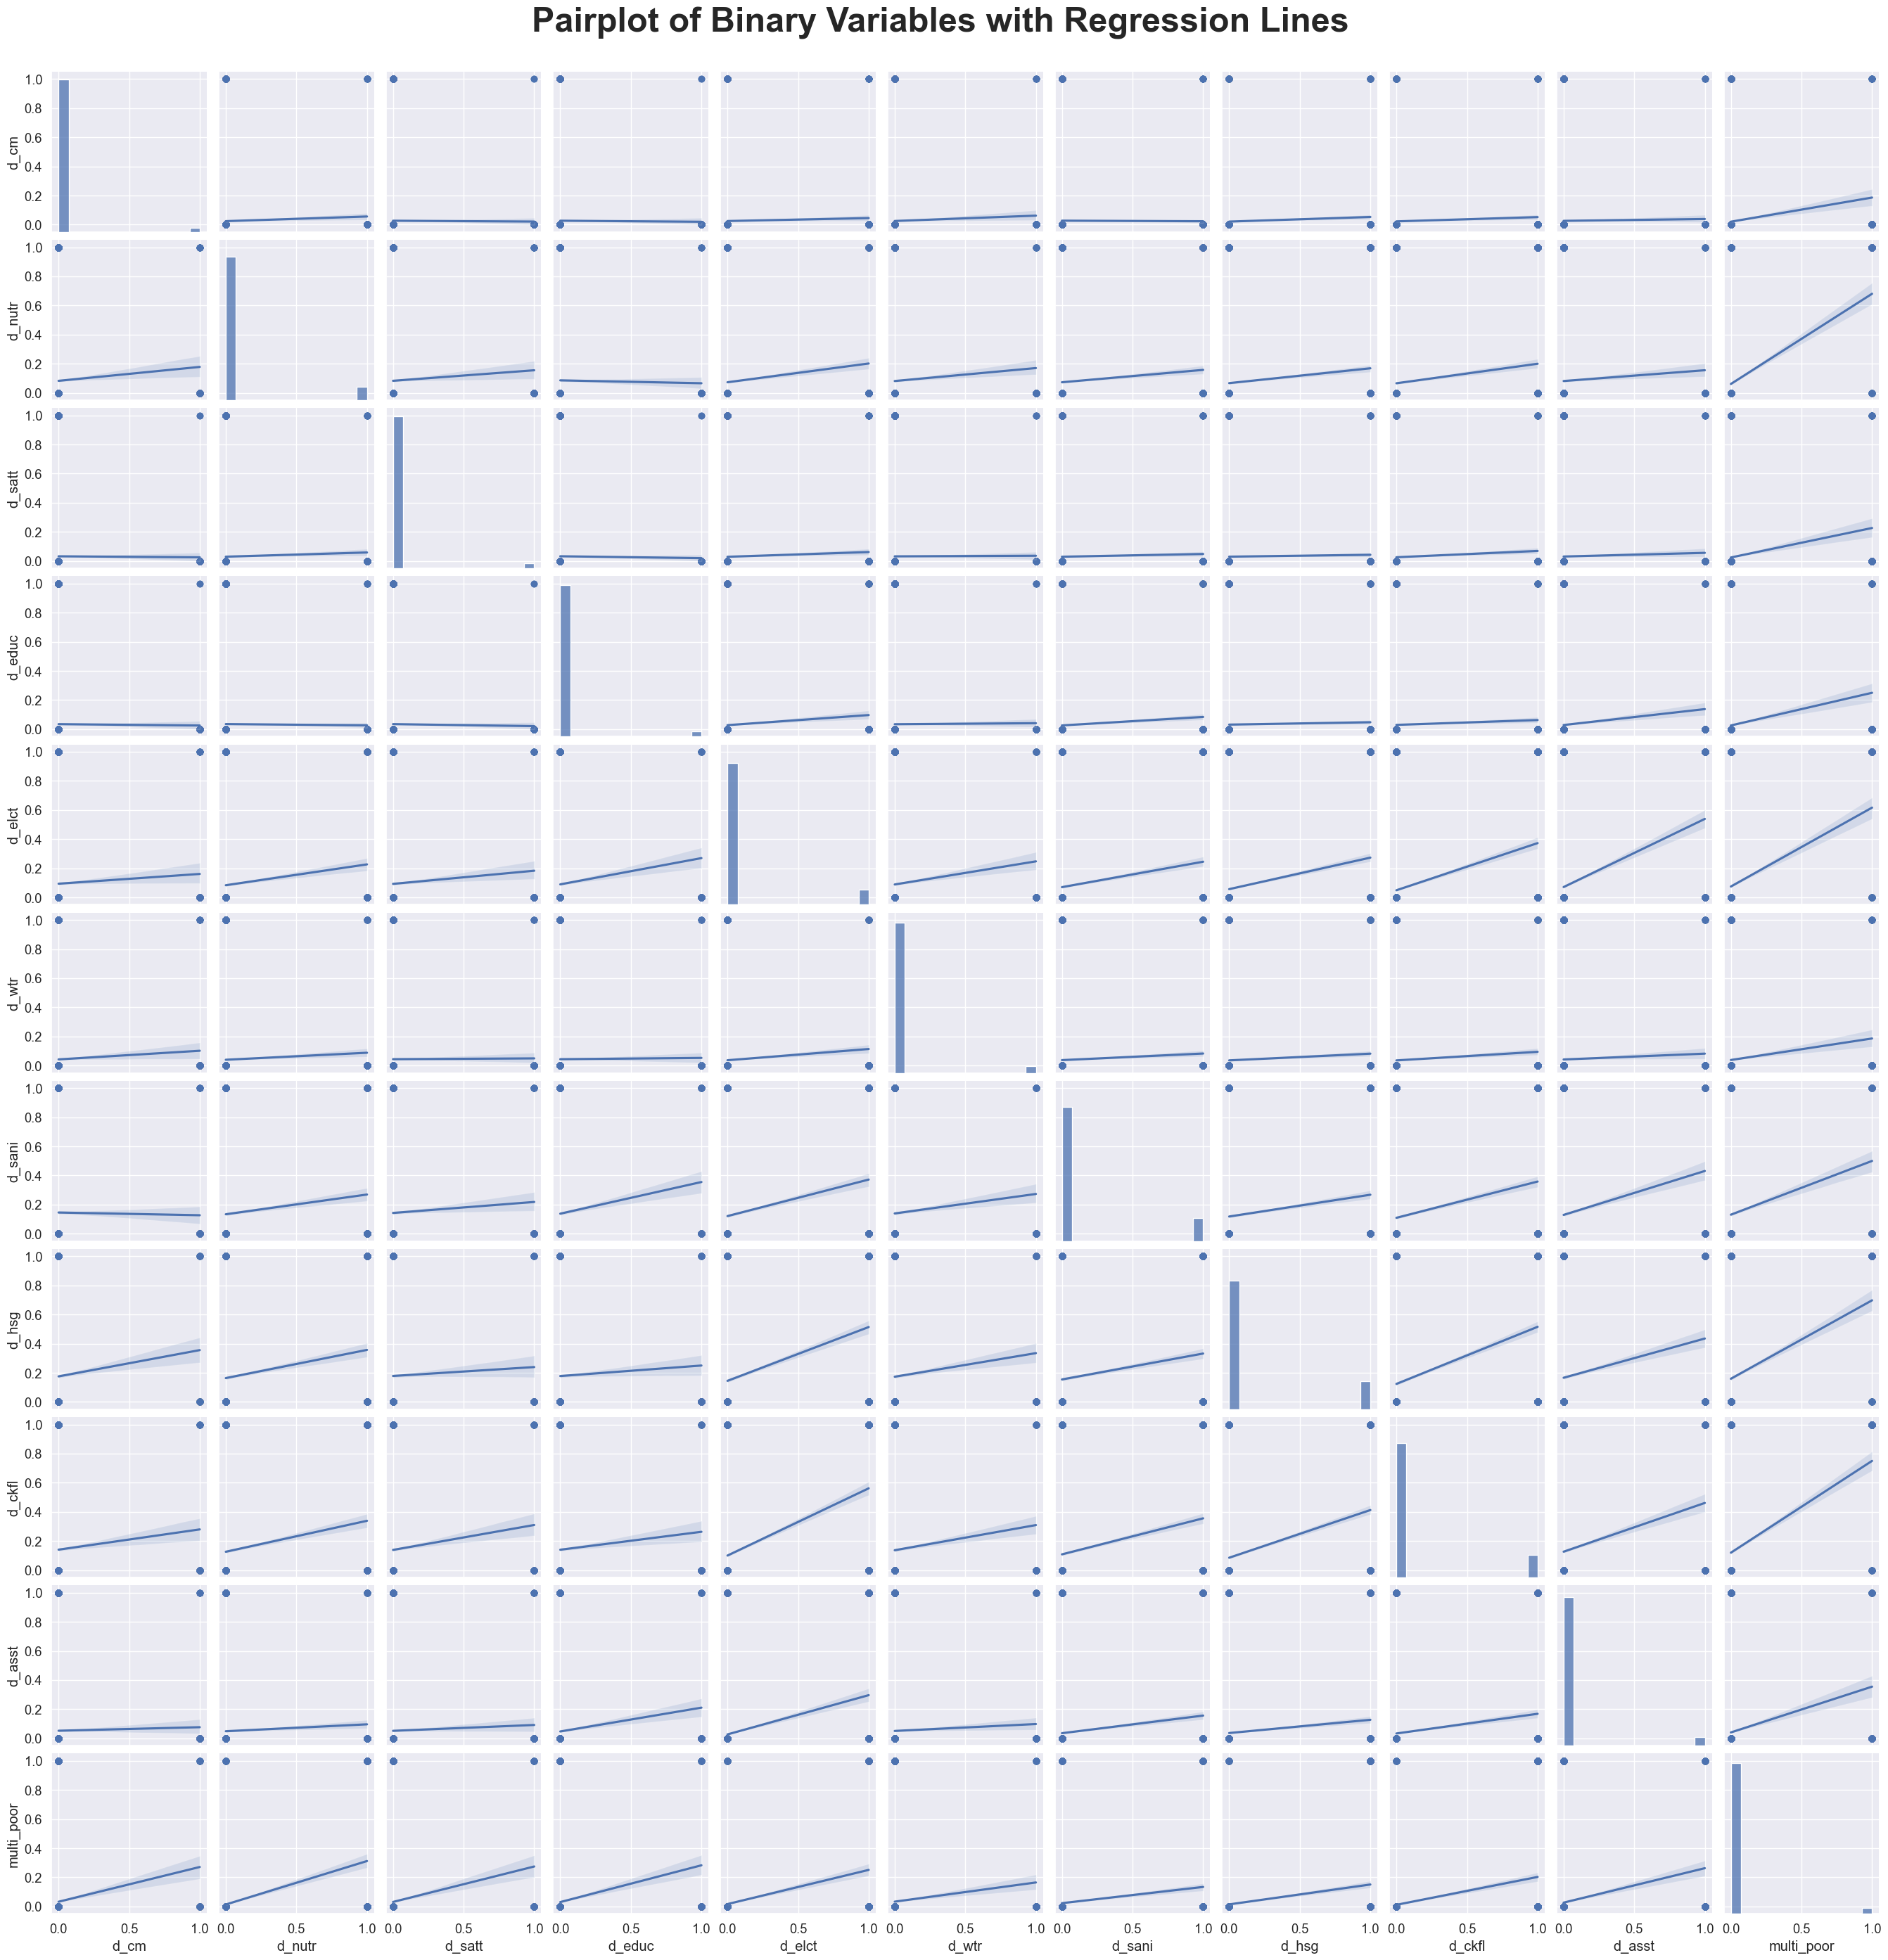

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the binary variables
binary_variables = ['d_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr', 'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'multi_poor']

# Plotting scatter plots for binary variables
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)  # Adjust font size if needed

# Create a pairplot
pair_plot = sns.pairplot(df[binary_variables], kind='reg')

# Set the title
pair_plot.fig.suptitle('Pairplot of Binary Variables with Regression Lines', fontsize=35, fontweight='bold', y=1.02)

# Show the plot
plt.show()


In [6]:
df = pd.read_csv('BELIZE_hh_nomiss.csv')
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.222222,0.0,5
4407,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.222222,0.0,10
4408,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0.388889,1.0,3
4409,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0.500000,1.0,6


## Considerations of MPI

In [33]:
df = pd.read_csv('BELIZE_hh_nomiss.csv').iloc[:, 1:]

In [34]:
df.head()

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,6


In [35]:
df.columns

Index(['hh_id', 'd_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr',
       'd_sani', 'd_hsg', 'd_ckfl', 'd_asst', 'weighted_sum', 'multi_poor',
       'ind_id_count'],
      dtype='object')

In [36]:
df['weighted_sum'].unique()

array([0.        , 0.16666667, 0.05555556, 0.11111111, 0.27777778,
       0.22222222, 0.38888889, 0.33333333, 0.44444444, 0.44444444,
       0.5       , 0.38888889, 0.55555556, 0.61111111, 0.5       ,
       0.66666667, 0.72222222])

In [37]:
percentage_distribution = df['weighted_sum'].value_counts(normalize=False)
percentage_distribution

weighted_sum
0.000000    2448
0.055556     759
0.166667     394
0.111111     277
0.222222     246
0.277778     115
0.333333      75
0.388889      33
0.444444      18
0.388889      14
0.555556      10
0.444444       8
0.500000       7
0.611111       2
0.500000       2
0.666667       2
0.722222       1
Name: count, dtype: int64

In [39]:
df_count = pd.DataFrame({'Weighted_sum': percentage_distribution.index, 'Count': percentage_distribution.values})
df_count

,Weighted_sum,Count
0,0.000000,2448
1,0.055556,759
2,0.166667,394
3,0.111111,277
4,0.222222,246
5,0.277778,115
6,0.333333,75
7,0.388889,33
8,0.444444,18
9,0.388889,14


In [40]:
type(df_count)

pandas.core.frame.DataFrame

In [41]:
import numpy as np

# Define conditions and corresponding labels
conditions = [
    df_count['Weighted_sum'] <= 0.33,
    (df_count['Weighted_sum'] > 0.33) & (df_count['Weighted_sum'] <= 0.39),
    (df_count['Weighted_sum'] > 0.39) & (df_count['Weighted_sum'] <= 0.49),
    (df_count['Weighted_sum'] > 0.49) & (df_count['Weighted_sum'] <= 0.59),
    (df_count['Weighted_sum'] > 0.59) & (df_count['Weighted_sum'] <= 0.69),
    (df_count['Weighted_sum'] > 0.69) & (df_count['Weighted_sum'] <= 0.79),
    df_count['Weighted_sum'] > 0.79
]

labels = [
    '< 33.3%',
    '33.3% - 39.9%',
    '40% - 49.9%',
    '50% - 59.9%',
    '60% - 69.9%',
    '70% - 79.9%',
    '> 80%'
]

# Create a new column based on conditions
df_count['Intensity_Deprivation'] = np.select(conditions, labels, default='Other')

# Display the DataFrame
df_count

,Weighted_sum,Count,Intensity_Deprivation
0,0.000000,2448,< 33.3%
1,0.055556,759,< 33.3%
2,0.166667,394,< 33.3%
3,0.111111,277,< 33.3%
4,0.222222,246,< 33.3%
5,0.277778,115,< 33.3%
6,0.333333,75,33.3% - 39.9%
7,0.388889,33,33.3% - 39.9%
8,0.444444,18,40% - 49.9%
9,0.388889,14,33.3% - 39.9%


In [68]:
df_count2 = df_count.iloc[:,1:]
df_count2

,Count,Intensity_Deprivation
0,2448,< 33.3%
1,759,< 33.3%
2,394,< 33.3%
3,277,< 33.3%
4,246,< 33.3%
5,115,< 33.3%
6,75,33.3% - 39.9%
7,33,33.3% - 39.9%
8,18,40% - 49.9%
9,14,33.3% - 39.9%


In [69]:
df_count2sum = df_count2.groupby('Intensity_Deprivation')['Count'].sum()
df_count2sum

Intensity_Deprivation
33.3% - 39.9%     122
40% - 49.9%        26
50% - 59.9%        19
60% - 69.9%         4
70% - 79.9%         1
< 33.3%          4239
Name: Count, dtype: int64

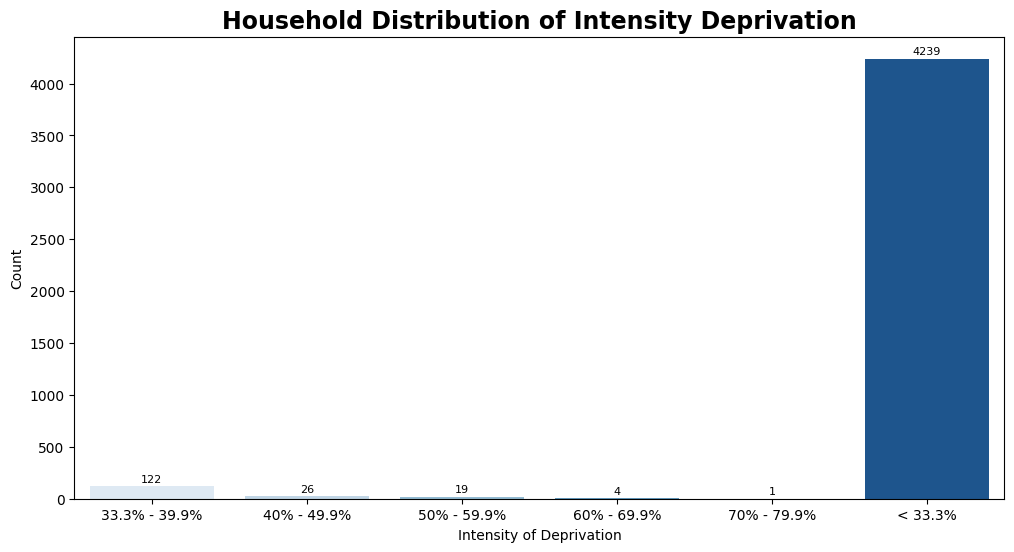

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Intensity_Deprivation': ['33.3% - 39.9%', '40% - 49.9%', '50% - 59.9%', '60% - 69.9%', '70% - 79.9%', '< 33.3%'],
    'Count': [122, 26, 19, 4, 1, 4239]
}

df = pd.DataFrame(data)

# Set the order of 'Intensity_Deprivation'

# Convert 'Intensity_Deprivation' to categorical with specified order

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='Intensity_Deprivation', y='Count', data=df, palette='Blues')

# Add data labels on top of the bars
for i, v in enumerate(df['Count']):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=8)

# Set the title and labels
plt.title('Household Distribution of Intensity Deprivation', fontsize=17, fontweight='bold')
plt.xlabel('Intensity of Deprivation')
plt.ylabel('Count')

# Show the plot
plt.show()


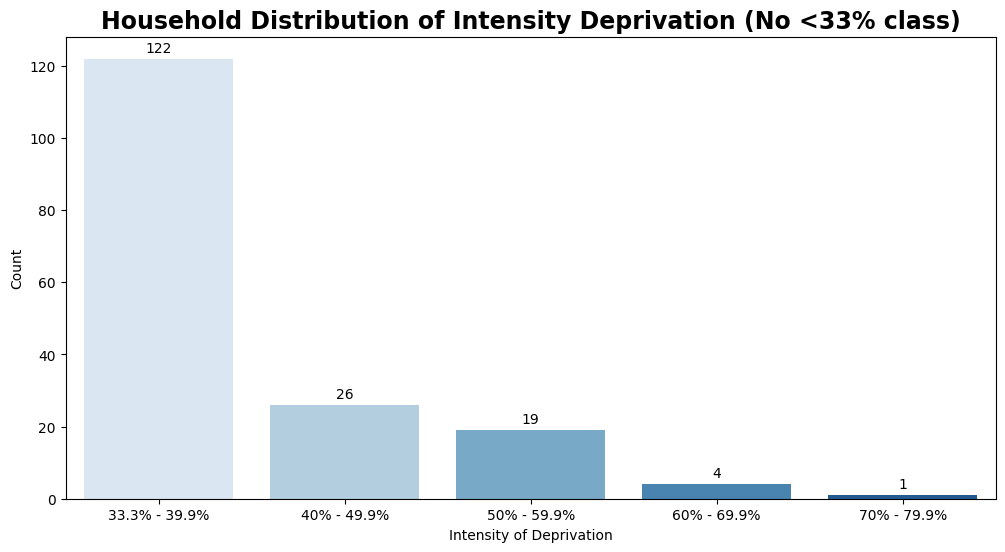

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Intensity_Deprivation': ['33.3% - 39.9%', '40% - 49.9%', '50% - 59.9%', '60% - 69.9%', '70% - 79.9%'],
    'Count': [122, 26, 19, 4, 1]
}

df = pd.DataFrame(data)

# Set the order of 'Intensity_Deprivation'

# Convert 'Intensity_Deprivation' to categorical with specified order

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='Intensity_Deprivation', y='Count', data=df, palette='Blues')

# Add data labels on top of the bars
for i, v in enumerate(df['Count']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Set the title and labels
plt.title('Household Distribution of Intensity Deprivation (No <33% class)', fontsize=17, fontweight='bold')
plt.xlabel('Intensity of Deprivation')
plt.ylabel('Count')

# Show the plot
plt.show()


In [42]:
df_pie = df_count.groupby('Intensity_Deprivation', as_index=False)['Count'].sum()
df_pie

,Intensity_Deprivation,Count
0,33.3% - 39.9%,122
1,40% - 49.9%,26
2,50% - 59.9%,19
3,60% - 69.9%,4
4,70% - 79.9%,1
5,< 33.3%,4239


In [44]:
df_pie['Count'].sort_values()

4       1
3       4
2      19
1      26
0     122
5    4239
Name: Count, dtype: int64

In [45]:
list(df_pie['Intensity_Deprivation'])

['33.3% - 39.9%',
 '40% - 49.9%',
 '50% - 59.9%',
 '60% - 69.9%',
 '70% - 79.9%',
 '< 33.3%']

In [47]:
list(df_pie['Count'])

[122, 26, 19, 4, 1, 4239]

In [48]:
l = ['33.3% - 39.9%',
 '40% - 49.9%',
 '50% - 59.9%',
 '60% - 69.9%',
 '70% - 79.9%',
 '0% - 33.3%']

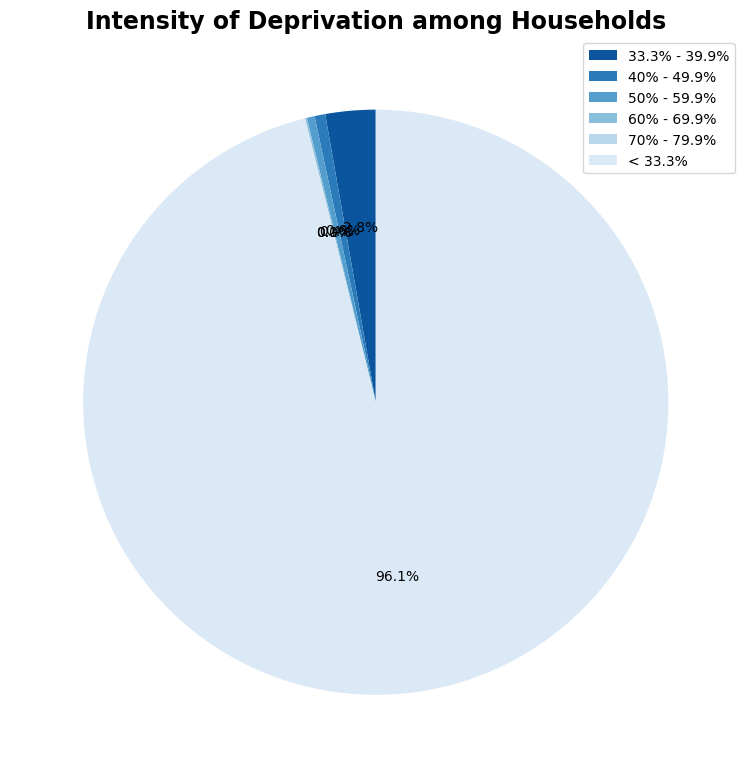

In [54]:
plt.figure(figsize=(9.5, 9.5))
plt.pie(list(df_pie['Count']), labels=None, autopct='%1.1f%%', startangle=90, colors=reversed(sns.color_palette("Blues")))

plt.title('Intensity of Deprivation among Households', fontsize=17, fontweight='bold')

plt.legend(list(df_pie['Intensity_Deprivation']), loc='best')

plt.show()


# Analysis Alkire-Foster

In [3]:
df = pd.read_csv('BELIZE_hh_nomiss.csv')

In [4]:
df.head()

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,6


In [5]:
df.dtypes

hh_id             int64
d_cm            float64
d_nutr          float64
d_satt          float64
d_educ          float64
d_elct            int64
d_wtr             int64
d_sani            int64
d_hsg           float64
d_ckfl            int64
d_asst            int64
weighted_sum    float64
multi_poor      float64
ind_id_count      int64
dtype: object

In [8]:
df.columns[1:-3]

Index(['d_cm', 'd_nutr', 'd_satt', 'd_educ', 'd_elct', 'd_wtr', 'd_sani',
       'd_hsg', 'd_ckfl', 'd_asst'],
      dtype='object')

In [9]:
percentage_counts = pd.DataFrame()

for column in df.columns[1:-3]:
    counts = df[column].value_counts(normalize=True) * 100
    percentage_counts[column] = counts

In [13]:
percentage_counts

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst
d_cm,,,,,,,,,,
0.0,97.32487,91.498526,96.780775,96.554069,90.433008,95.601904,85.468148,81.976876,85.581501,94.740422
1.0,2.67513,8.501474,3.219225,3.445931,9.566992,4.398096,14.531852,18.023124,14.418499,5.259578


In [15]:
list(percentage_counts.iloc[1,:])

[2.675130355928361,
 8.501473588755385,
 3.2192246656087056,
 3.4459306279755157,
 9.566991611879393,
 4.398095669916119,
 14.531852187712538,
 18.023124008161414,
 14.41849920652913,
 5.259578326909998]

In [71]:
censored_headcount_ratios = list(percentage_counts.iloc[1,:])
indicators = list(percentage_counts.columns)
censored_headcount_ratios, indicators

([2.675130355928361,
  8.501473588755385,
  3.2192246656087056,
  3.4459306279755157,
  9.566991611879393,
  4.398095669916119,
  14.531852187712538,
  18.023124008161414,
  14.41849920652913,
  5.259578326909998],
 ['d_cm',
  'd_nutr',
  'd_satt',
  'd_educ',
  'd_elct',
  'd_wtr',
  'd_sani',
  'd_hsg',
  'd_ckfl',
  'd_asst'])

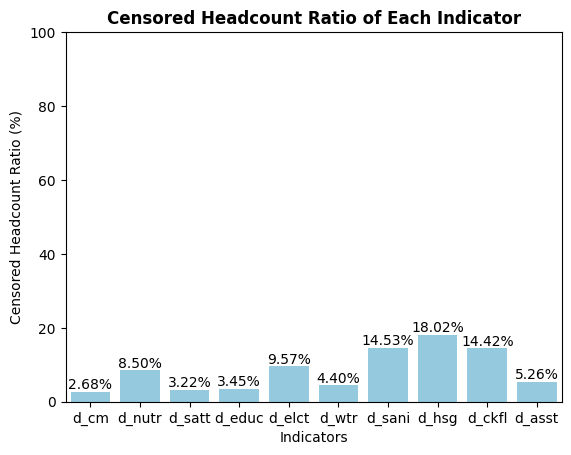

In [42]:
ax = sns.barplot(x=indicators, y=censored_headcount_ratios, color='skyblue')

# Set labels and title
plt.xlabel('Indicators')
plt.ylabel('Censored Headcount Ratio (%)')
plt.title('Censored Headcount Ratio of Each Indicator', fontweight='bold')
plt.ylim(0, 100)

for i, ratio in enumerate(censored_headcount_ratios):
    ax.annotate(f'{ratio:.2f}%', (i, ratio), ha='center', va='bottom')

# Show the plot
plt.show()

/var/folders/j2/59z_kfcx2vdffmhqbypjyx0c0000gn/T/ipykernel_97688/343487967.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in legend_labels.values()]


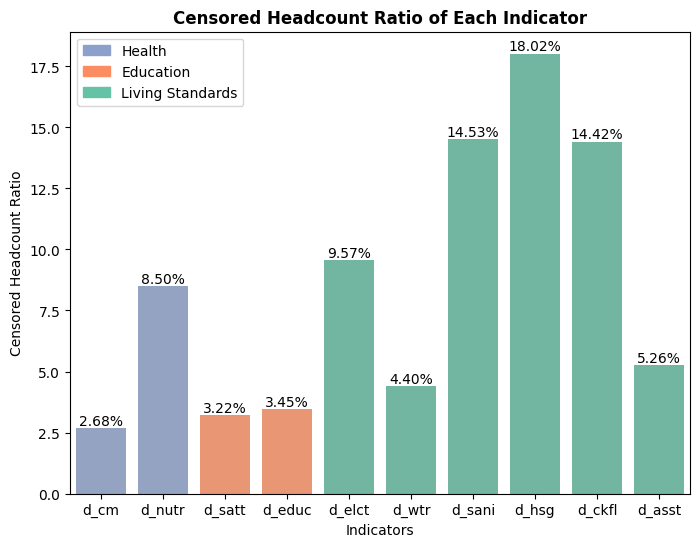

In [69]:
# Assign groups to indicators
health_group = ['d_cm', 'd_nutr']
education_group = ['d_satt', 'd_educ']

# Create a custom palette for the groups
palette = {indicator: sns.color_palette("Set2")[2] for indicator in health_group}
palette.update({indicator: sns.color_palette("Set2")[1] for indicator in education_group})
palette.update({indicator: sns.color_palette("Set2")[0] for indicator in set(indicators) - set(health_group + education_group)})

plt.figure(figsize=(8, 6))

# Plotting the censored headcount ratios with the custom palette
ax = sns.barplot(x=indicators, y=censored_headcount_ratios, palette=palette.values())

# Annotate bars with censored_headcount_ratios rounded to two decimal values
for i, ratio in enumerate(censored_headcount_ratios):
    ax.annotate(f'{ratio:.2f}%', (i, ratio), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Indicators')
plt.ylabel('Censored Headcount Ratio')
plt.title('Censored Headcount Ratio of Each Indicator', fontweight='bold')

# Create a legend
legend_labels = {'Health': sns.color_palette("Set2")[2], 'Education': sns.color_palette("Set2")[1], 
                 'Living Standards': sns.color_palette("Set2")[0]}
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in legend_labels.values()]
plt.legend(handles, legend_labels.keys(), loc='upper left')

# Show the plot
plt.show()

/var/folders/j2/59z_kfcx2vdffmhqbypjyx0c0000gn/T/ipykernel_97688/3269801830.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in legend_labels.values()]


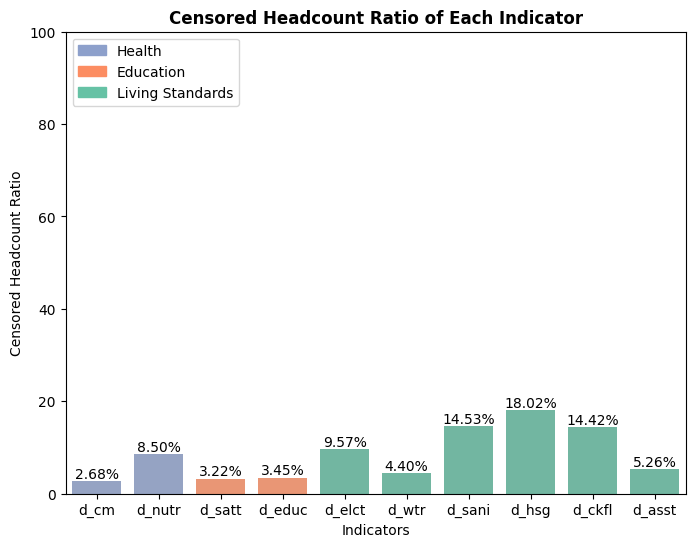

In [70]:
# Assign groups to indicators
health_group = ['d_cm', 'd_nutr']
education_group = ['d_satt', 'd_educ']

# Create a custom palette for the groups
palette = {indicator: sns.color_palette("Set2")[2] for indicator in health_group}
palette.update({indicator: sns.color_palette("Set2")[1] for indicator in education_group})
palette.update({indicator: sns.color_palette("Set2")[0] for indicator in set(indicators) - set(health_group + education_group)})

plt.figure(figsize=(8, 6))

# Plotting the censored headcount ratios with the custom palette
ax = sns.barplot(x=indicators, y=censored_headcount_ratios, palette=palette.values())

# Annotate bars with censored_headcount_ratios rounded to two decimal values
for i, ratio in enumerate(censored_headcount_ratios):
    ax.annotate(f'{ratio:.2f}%', (i, ratio), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Indicators')
plt.ylabel('Censored Headcount Ratio')
plt.title('Censored Headcount Ratio of Each Indicator', fontweight='bold')
plt.ylim(0, 100)


# Create a legend
legend_labels = {'Health': sns.color_palette("Set2")[2], 'Education': sns.color_palette("Set2")[1], 
                 'Living Standards': sns.color_palette("Set2")[0]}
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in legend_labels.values()]
plt.legend(handles, legend_labels.keys(), loc='upper left')

# Show the plot
plt.show()

In [83]:
censored_headcount_ratios

[2.675130355928361,
 8.501473588755385,
 3.2192246656087056,
 3.4459306279755157,
 9.566991611879393,
 4.398095669916119,
 14.531852187712538,
 18.023124008161414,
 14.41849920652913,
 5.259578326909998]

In [76]:
weights = [
    1 / 6,  # Nutrition
    1 / 6,  # Child mortality
    1 / 6,  # Years of schooling
    1 / 6,  # School attendance
    1 / 18,  # Cooking fuel
    1 / 18,  # Sanitation
    1 / 18,  # Drinking water
    1 / 18,  # Electricity
    1 / 18,  # Housing
    1 / 18,  # Assets
]

In [80]:
[censored_headcount_ratios[i]*weights[i] for i in range(len(weights))]

[0.44585505932139347,
 1.416912264792564,
 0.5365374442681176,
 0.5743217713292526,
 0.5314995339932996,
 0.24433864832867325,
 0.8073251215395854,
 1.0012846671200786,
 0.8010277336960627,
 0.2921987959394443]

### **Percentage Contribution** plot TODO!

# Self-organizing Maps (SOM)

In [17]:
df = pd.read_csv('./BELIZE_hh.csv')

In [18]:
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,miss,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0,0.222222,0.0,5
4632,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0,0.222222,0.0,10
4633,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0,0.388889,1.0,3
4634,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0,0.500000,1.0,6


In [19]:
df = df.drop("miss", axis=1)

In [20]:
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.222222,0.0,5
4632,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.222222,0.0,10
4633,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0.388889,1.0,3
4634,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0.500000,1.0,6


In [21]:
df = df.dropna()
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.222222,0.0,5
4632,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.222222,0.0,10
4633,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0.388889,1.0,3
4634,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0.500000,1.0,6


In [22]:
df.isnull().sum()

hh_id           0
d_cm            0
d_nutr          0
d_satt          0
d_educ          0
d_elct          0
d_wtr           0
d_sani          0
d_hsg           0
d_ckfl          0
d_asst          0
weighted_sum    0
multi_poor      0
ind_id_count    0
dtype: int64

In [23]:
df.to_csv('./BELIZE_hh_nomiss.csv')

In [24]:
df = pd.read_csv('./BELIZE_hh_nomiss.csv')

In [26]:
df = df.iloc[:, 1:]

In [27]:
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.222222,0.0,5
4407,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.222222,0.0,10
4408,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0.388889,1.0,3
4409,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0.500000,1.0,6


In [28]:
ind_id_count_distr = df.groupby('ind_id_count', as_index=False)['hh_id'].size()
ind_id_count_distr

,ind_id_count,size
0,1,598
1,2,604
2,3,719
3,4,815
4,5,633
5,6,415
6,7,259
7,8,162
8,9,80
9,10,49


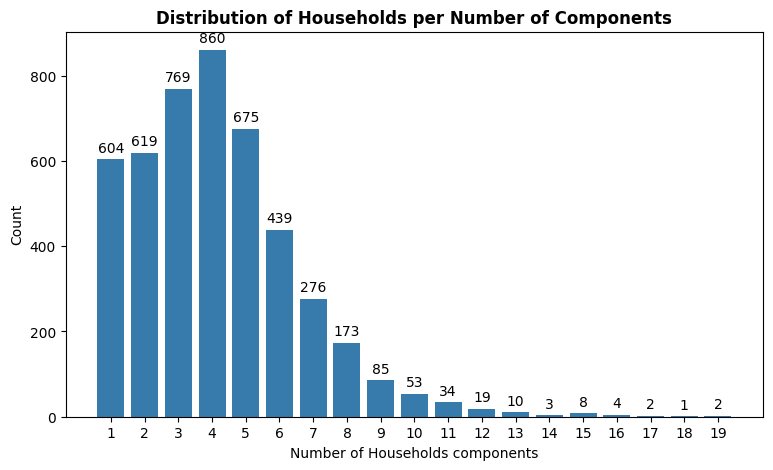

In [29]:

# Assuming your data is in a DataFrame named df
dfsort = pd.DataFrame({
    'ind_id_count': [604, 619, 769, 860, 675, 439, 276, 173, 85, 53, 34, 19, 10, 3, 8, 4, 2, 1, 2],
    'size': list(range(1, 20))
})

# Set the width of the bars
bar_width = 0.8  # Adjust this value to control the width of the bars

# Set the figsize for the entire figure
fig, ax = plt.subplots(figsize=(9,5))

# Create a bar plot with more space between bars
ax.bar(dfsort['size'], dfsort['ind_id_count'], width=bar_width, color=sns.color_palette("Blues_d")[-3])

# Add value labels on top of each bar
for i, value in enumerate(dfsort['ind_id_count']):
    ax.text(dfsort['size'][i], value + 10, str(value), ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Number of Households components')
ax.set_ylabel('Count')
ax.set_title('Distribution of Households per Number of Components' , fontweight='bold')

# Adjust x-axis ticks and labels to center bars
ax.set_xticks(dfsort['size'])
ax.set_xticklabels(dfsort['size'], ha='center')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust this value to control the space between bars

# Show the plot
plt.show()



In [5]:
df = pd.read_csv('BELIZE_hh_nomiss.csv')

In [7]:
df = df.iloc[:, 1:]

In [8]:
df

,hh_id,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst,weighted_sum,multi_poor,ind_id_count
0,101,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,2
1,102,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,1
2,103,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,4
3,104,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,5
4,105,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,21820,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.222222,0.0,5
4407,21821,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0,0.222222,0.0,10
4408,21822,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0,0.388889,1.0,3
4409,21823,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0,0.500000,1.0,6


In [10]:
df_binary = df.iloc[:, 1:-3]
df_binary

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
4406,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0
4407,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0
4408,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0
4409,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0


In [11]:
df_binary.shape

(4411, 10)

In [17]:
import numpy as np
from minisom import MiniSom

# Assuming df is your DataFrame
data = df.values  # Convert DataFrame to NumPy array

# Define your SOM parameters (e.g., input_len, map_size, etc.)
input_len = data.shape[1]  # Number of features in your data
map_size = (5, 5)  # Adjust as needed
sigma = 1.0  # Adjust as needed
learning_rate = 0.5  # Adjust as needed

# Initialize the SOM
som = MiniSom(map_size[0], map_size[1], input_len, sigma=sigma, learning_rate=learning_rate)

# Train the SOM
som.train_random(data, 2000)  # Adjust the number of iterations based on your dataset size and complexity


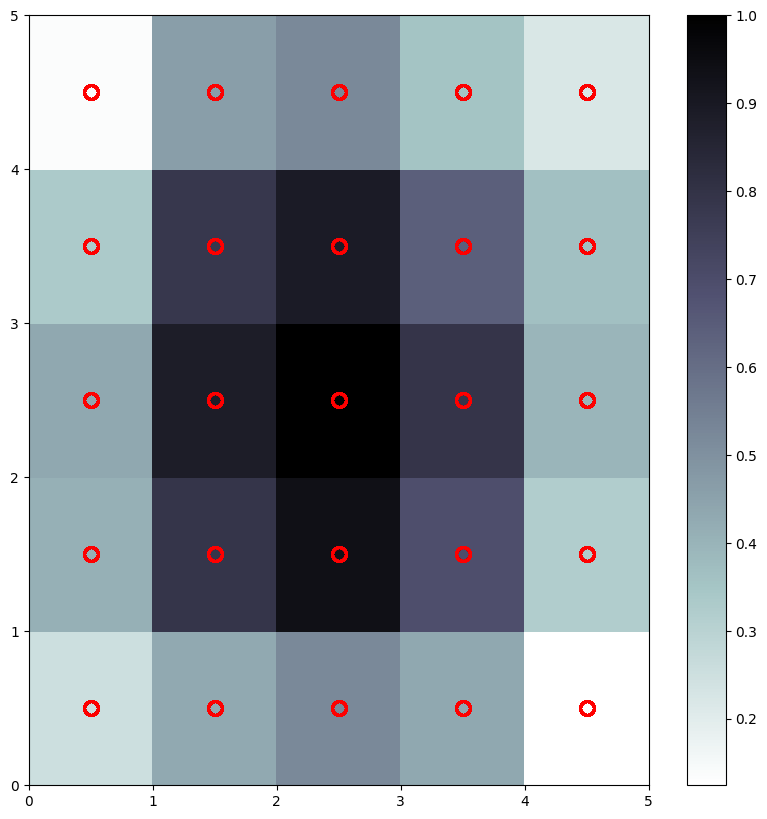

In [22]:
# Visualize the SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # U-Matrix
plt.colorbar()

# Add markers for each data point on the map
for i, x in enumerate(data):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

plt.show()


In [23]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

In [29]:
df_binary.shape

(4411, 10)

In [30]:
df_binary

,d_cm,d_nutr,d_satt,d_educ,d_elct,d_wtr,d_sani,d_hsg,d_ckfl,d_asst
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
4406,0.0,1.0,0.0,0.0,0,0,0,1.0,0,0
4407,0.0,1.0,0.0,0.0,0,0,0,0.0,1,0
4408,0.0,1.0,0.0,0.0,1,0,1,1.0,1,0
4409,1.0,1.0,0.0,0.0,1,0,0,1.0,1,0


In [ ]:

t = data['target'].values
data = data[data.columns[:-1]]

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# initialization and training of 15x15 SOM
som = MiniSom(15, 15, data.shape[1], sigma=1.5, learning_rate=.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)

som.train(data, 1000, verbose=True)